<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/vgoehler/SchuelerUniTUBAF2025/blob/main/00_Perceptron_MNIST.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/vgoehler/SchuelerUniTUBAF2025/blob/main/00_Perceptron_MNIST.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# Mathematics of Machine Learning

## Section 2.1: The Perceptron

**Author:** Björn Sprungk

### Script for evaluating the perceptron-learned hypothesis for MNIST.

### (0) Preliminaries
Loading required libraries and load the data

In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt 

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split



# change font size for all matplotlib plots
import matplotlib
matplotlib.rc('font', size=14)

Wir laden das perceptron, brauchen mehr logic für google colab

In [3]:
import sys

# Überprüfen, ob das Notebook in Google Colab läuft
if "google.colab" in sys.modules:
    !git clone https://github.com/vgoehler/SchuelerUniTUBAF2025.git
    sys.path.append("/content/SchuelerUniTUBAF2025")  # Pfad zum Repository hinzufügen

# file is in root folder, and should be available in google colab also ^.^
from my_perceptron import my_perceptron  # see: my_perceptron.py

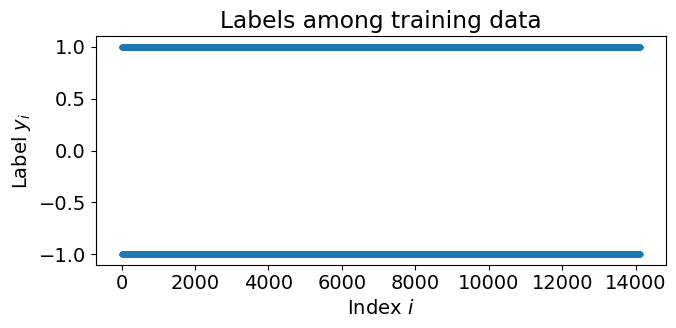

In [4]:
# Load data 
# WARNING: This can take some time
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='auto')

#x = np.genfromtxt("data_MNIST_X.csv", delimiter=',')
#y = np.genfromtxt("data_MNIST_Y.csv", delimiter=',')

# Extracting "7" and "8"
ind = np.concatenate(np.where( (y == '7') | (y == '8')))
X = X[ind,:].T
y = y[ind]

# Transfoming feature to [0,1]
X = X/np.max(X)

# Transfoming the labels into +1 (7) and -1 (8)
y[np.where(y=='7')]=1
y[np.where(y=='8')]=-1

# Plotting distribution of label on training data
fig, ax = plt.subplots(figsize=(7, 3.5))
ax.plot(np.arange(np.size(y)), y, ".")
ax.set_title("Labels among training data")
ax.set_xlabel("Index $i$")
ax.set_ylabel("Label $y_i$")
fig.tight_layout()
plt.show()

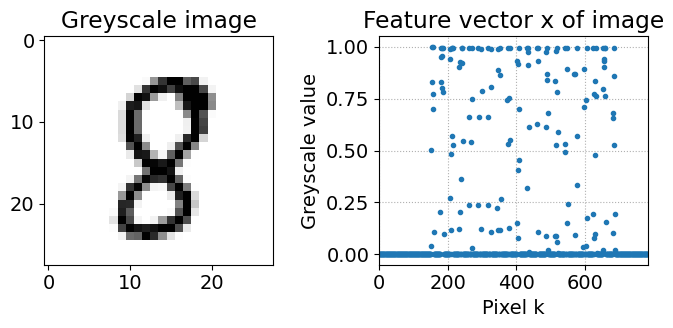

In [5]:
# Plotting one greyscale image and its feature vector
i = 1500
im = np.array(X[:,i])
im.resize(28,28)

plt.rcParams.update({'font.size': 14})
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7, 3.5))
ax1.imshow(im, cmap = "Greys")
ax1.set_title("Greyscale image")
ax2.plot(np.arange(784), X[:,i], ".")
ax2.set_title("Feature vector x of image")
ax2.set_xlabel("Pixel k")
ax2.set_ylabel("Greyscale value")
ax2.grid(linestyle='dotted')
ax2.set_xlim(0, 783)
fig.tight_layout()
plt.show()

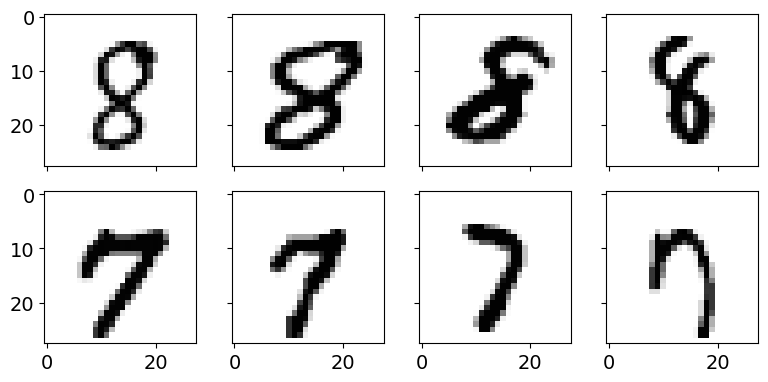

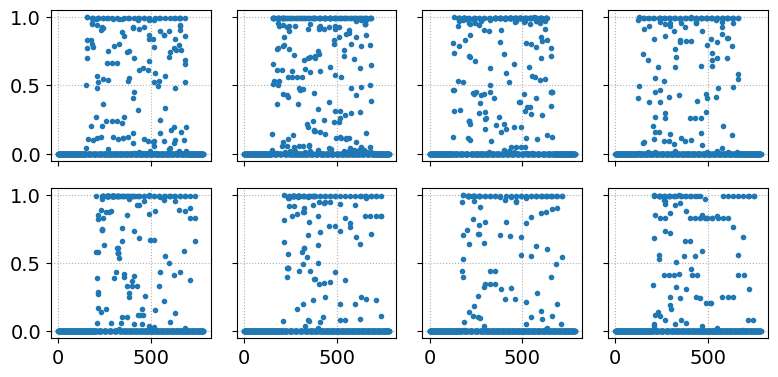

In [6]:
# Plotting sevens and eights 
inds = [1500,2000,3000,4000,7000, 8000, 9000, 10000]
fig, axs = plt.subplots(nrows=2, ncols=4,
                        figsize=(8, 4), 
                        sharey=True, # sharing same y-axis
                        sharex=True  # sharing same x-axis
                       )

for step, i in enumerate(inds):
    im = np.array(X[:,i])
    im.resize(28,28)
    ax = axs.flat[step]
    ax.imshow(im, cmap = "Greys")
fig.tight_layout()
plt.show()

# ... and their feature vectors 
fig, axs = plt.subplots(nrows=2, ncols=4,
                        figsize=(8, 4), 
                        sharey=True, # sharing same y-axis
                        sharex=True  # sharing same x-axis
                       )

for step, i in enumerate(inds):
    ax = axs.flat[step]
    ax.plot(np.arange(784), X[:,i], ".")
    ax.grid(linestyle='dotted')
fig.tight_layout()
plt.show()

### (1) Apply the perceptron algorithm

In [7]:
%%time

# WARNING: This can take some time
[w, T, ws, RSs] = my_perceptron(x=X, y=y, b=1, n_iter=2000, rng=np.random.default_rng(seed=17))

# Output final empirical risk (= misclassification rate)
RSs[-1], 1 - RSs[-1]

CPU times: user 3min 25s, sys: 1min 58s, total: 5min 23s
Wall time: 21 s


(0.005949851253718657, 0.9940501487462814)

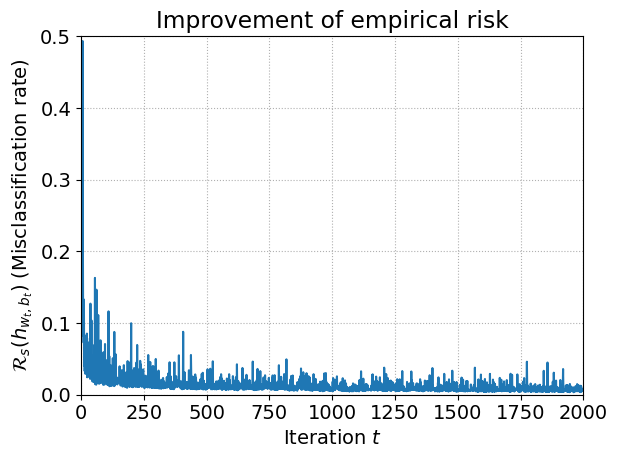

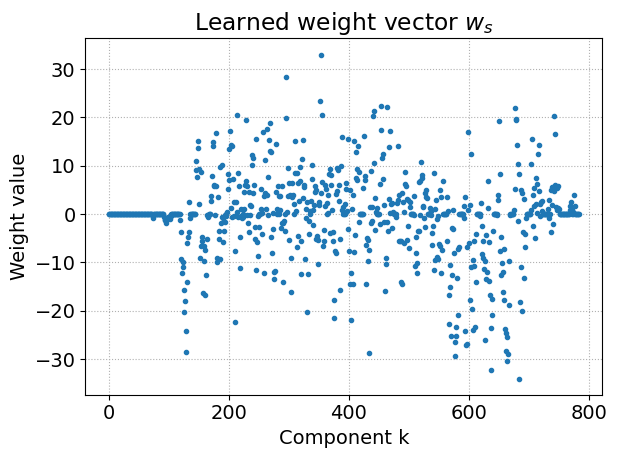

w[-1] = 86.0


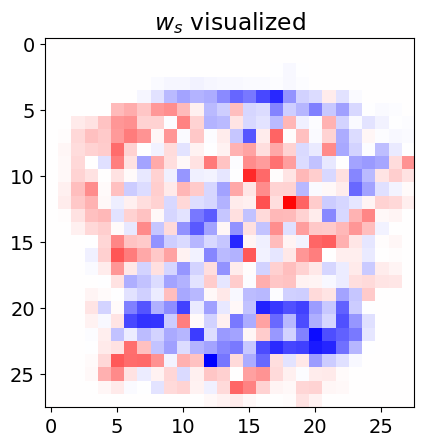

w[-1] = 86.0


In [8]:
# Plot "improvement" in empirical risk
fig, ax = plt.subplots()
ax.plot(np.arange(T), RSs[1:], "-")
ax.set_title("Improvement of empirical risk")
ax.set_xlabel("Iteration $t$")
ax.set_ylabel("$\mathcal{R}_s(h_{w_t,b_t})$ (Misclassification rate)")
ax.set(xlim=(0, T), ylim=(0, 0.5))
ax.grid(linestyle='dotted')
fig.tight_layout()
plt.show()

# Plot learned weight vector w_s and output learned bias b_s
fig, ax = plt.subplots()
ax.plot(np.arange(784), w[:784], ".")
ax.set_title("Learned weight vector $w_s$")
ax.set_xlabel("Component k")
ax.set_ylabel("Weight value")
ax.grid(linestyle='dotted')
ax2.set_xlim(0, 783)
fig.tight_layout()
plt.show()
print("w[-1] =", w[-1])


# Plot learned weight vector w_s and output learned bias b_s
fig, ax = plt.subplots()
coef = w[:784]
scale = np.abs(coef).max()
ax.imshow(
        coef.reshape(28, 28),
        interpolation="nearest",
        cmap = "bwr",
        vmin=-scale,
        vmax=scale,
    )
ax.set_title("$w_s$ visualized")
plt.show()
print("w[-1] =", w[-1])

Definition of the learned hypothesis (outputting "7" and "8")

In [9]:
h_S = lambda x, w: 7.5 - 0.5 * np.sign(w @ np.append(x, 1))

### (a) How many misclassifications are there in the training dataset?

### (2) Find all misclassified images

In [10]:
# the number of data m from y
m = y.shape[0]
m

14118

In [11]:
# Function to check the constraints
check = lambda w, x, y, m: y * (w @ np.append(x, np.ones((1, m)), axis=0))

# find indices of misclassified images
inds = np.where( check(w, X, y, y.shape[0]) <0 )[0]
inds

array([   75,   259,   593,   736,  1184,  1224,  1361,  1445,  1527,
        1850,  2386,  2401,  2705,  2917,  2928,  3041,  3393,  3509,
        3657,  3696,  3793,  3847,  3930,  4083,  4380,  4702,  4759,
        4805,  5152,  5266,  5298,  5362,  5428,  6000,  6097,  6306,
        6608,  7353,  7405,  7423,  7529,  7559,  7626,  7851,  8019,
        8371,  8564,  8585,  8603,  8661,  8745,  8751,  8772,  8818,
        8872,  9003,  9180,  9262,  9272,  9539,  9647,  9757,  9867,
        9918, 10108, 10117, 10451, 10854, 10931, 11129, 11658, 11661,
       11943, 12274, 12414, 12642, 12767, 12870, 12871, 12986, 13006,
       13432, 13465, 13697])

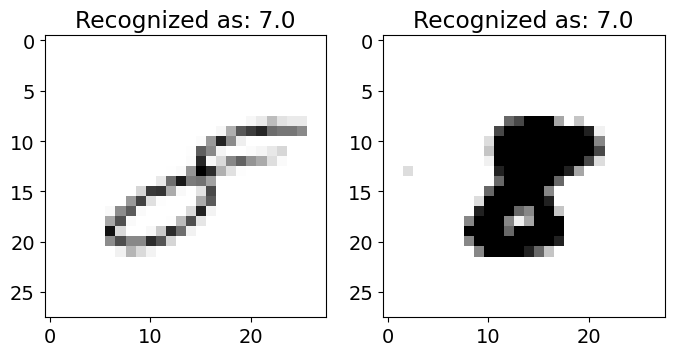

In [12]:
# Plot first of these pictures
x_first = X[:,inds[0]]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.imshow(np.reshape(x_first, (28, 28)), cmap="Greys")
ax1.set_title(f"Recognized as: {h_S(x_first, w)}")

# plot the last of these pictures
x_last = X[:,inds[-1]]
ax2.imshow(np.reshape(x_last, (28, 28)), cmap="Greys")
ax2.set_title(f"Recognized as: {h_S(x_last, w)}")
plt.show()

### (3) Select correctly classified image and fool the Perceptron

In [13]:
# find indexes of correctly classified images
ch = check(w, X, y, m)
inds_correct = np.where(ch>0)[0]
inds_correct

array([    0,     1,     2, ..., 14115, 14116, 14117])

In [14]:
# Random selection by random component of indexes
rng=np.random.default_rng(seed=42)
i = rng.choice(inds_correct)
i

1258

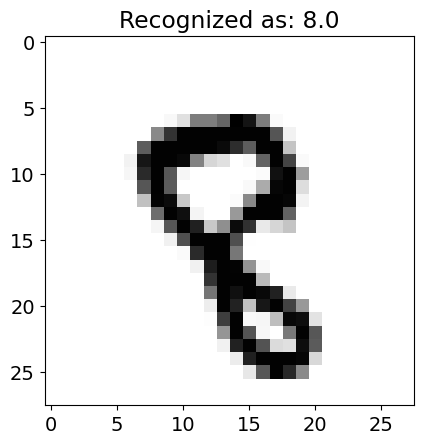

In [15]:
# plot the image
x_item = X[:,i]
y_item = y[i]
im = plt.imshow(np.reshape(x_item, (28, 28)), cmap='Greys')
plt.title(f'Recognized as: {h_S(x_item, w)}')
plt.show()

#### (3a) Compute perturbation "by hand"

In [16]:
# determine direction of perturbation v (depending on the label of x)
if y_item > 0: 
    v = w * (w < 0) # negative part of w
else:
    v = w * (w > 0) # positive part of w

# omit bias
v = v[:-1]

# find correct scale e: 
e = -1.1 * w @ np.append(x_item, 1) / (w[:-1] @ v)

# Checking whether thereafter actually misclassified
(y_item * w @ np.append(x_item + e*v, 1)) < 0

True

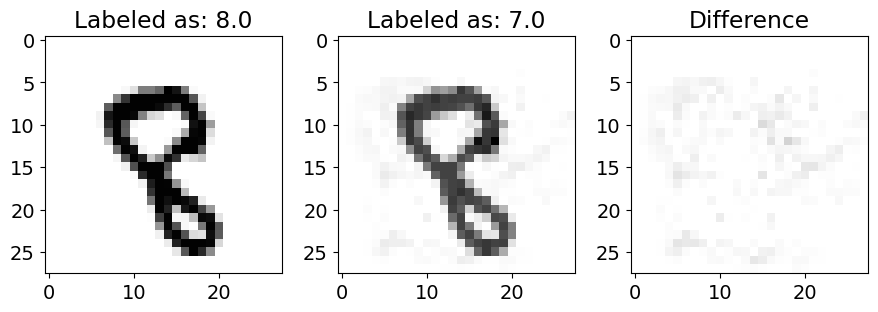

In [17]:
# Plot the images and pertubations
fig, axs = plt.subplots(1, 3, figsize = (9,9))
axs_0 = axs[0].imshow(np.reshape(x_item, (28, 28)), cmap='Greys')
axs[0].set_title(f'Labeled as: {h_S(x_item, w)}')
axs[1].imshow(np.reshape(x_item + e*v, (28, 28)), cmap='Greys')
axs[1].set_title(f'Labeled as: {h_S(x_item + e*v, w)}')
im = axs[2].imshow(np.reshape(e*v, (28, 28)), cmap='Greys', vmax=1, vmin = 0)
axs[2].set_title('Difference')
fig.tight_layout()
plt.show()

#### (3b) Compute perturbation by hand optimization

In [18]:
# Compute minimal perturbation by optimization

# target
fun = lambda x: sum((x-x_item)**2)

#linear_constraint (= to be misclassified)
d = X.shape[0]
coef = w[:784]
b = w[-1]

con = opt.LinearConstraint(y_item * coef , ub = -y_item * b)

# Constraint optimization ensuring the greyscales are between 0 and 1:
opt_perturb = opt.minimize(fun, x_item + e*v, bounds = ((0,1),) * d, constraints = con, method='SLSQP')
x_perturb = opt_perturb.x

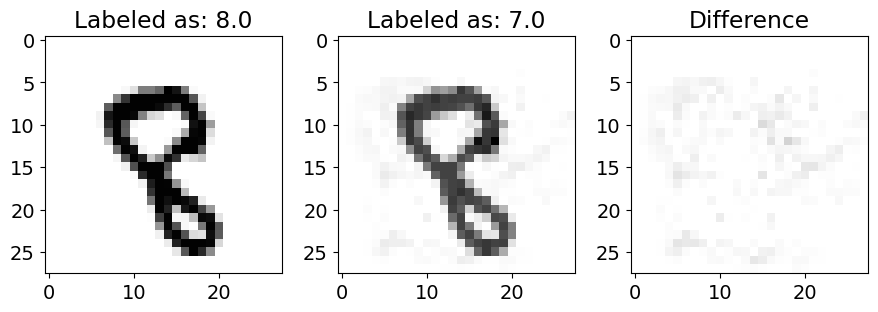

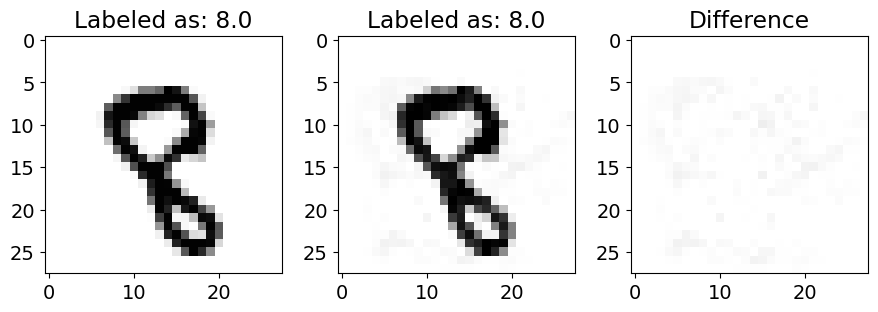

In [19]:
# Plot the images and pertubations computed by hand
fig, axs = plt.subplots(1, 3, figsize = (9,9))
axs_0 = axs[0].imshow(np.reshape(x_item, (28, 28)), cmap='Greys')
axs[0].set_title(f'Labeled as: {h_S(x_item, w)}')
axs[1].imshow(np.reshape(x_item + e*v, (28, 28)), cmap='Greys')
axs[1].set_title(f'Labeled as: {h_S(x_item + e*v, w)}')
im = axs[2].imshow(np.reshape(e*v, (28, 28)), cmap='Greys', vmax=1, vmin = 0)
axs[2].set_title('Difference')
fig.tight_layout()
plt.show()


# Plot the images and pertubations computed by optimization
fig, axs = plt.subplots(1, 3, figsize = (9,9))
axs_0 = axs[0].imshow(np.reshape(x_item, (28, 28)), cmap='Greys')
axs[0].set_title(f'Labeled as: {h_S(x_item, w)}')
axs[1].imshow(np.reshape(x_perturb, (28, 28)), cmap='Greys')
axs[1].set_title(f'Labeled as: {h_S(x_perturb, w)}')
im = axs[2].imshow(np.reshape(x_perturb - x_item, (28, 28)), cmap='Greys', vmax=1, vmin = 0)
axs[2].set_title('Difference')
fig.tight_layout()
plt.show()

### (4) Check for Overfitting during training

In [20]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size = 0.3, random_state = 17, shuffle=True)
X_train = X_train.T
X_test = X_test.T

In [21]:
%%time
# WARNING: This can take some time
[w, T, ws, RSs] = my_perceptron(x=X_train, y=y_train, b=1, n_iter=5000, rng=np.random.default_rng(seed=17))
print(T)

# Output final empirical risk (= misclassification rate)
RSs[-1], 1 - RSs[-1]

3213
CPU times: user 3min 40s, sys: 2min 24s, total: 6min 4s
Wall time: 23.8 s


(0.0, 1.0)

In [22]:
# Compute the test error during the iterations

# Function to check the constraints
check = lambda w, x, y, m: y * (w @ np.append(x, np.ones((1, m)), axis=0))

# Calculation of the obtained test risk
m_test = X_test.shape[1]
R_test = lambda w: np.mean(check(w, X_test, y_test, m_test)  <= 0)

R_tests = np.zeros(T+1)
for i in np.arange(T+1):
    R_tests[i] = R_test(ws[i])

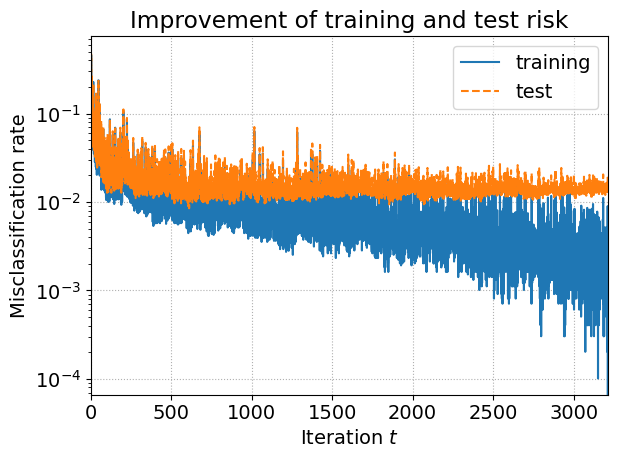

In [23]:
# Plot "improvement" in empirical risk
fig, ax = plt.subplots()
ax.plot(np.arange(T), RSs[1:], "-", label = "training")
ax.plot(np.arange(T), R_tests[1:], "--", label = "test")
ax.set_title("Improvement of training and test risk")
ax.set_xlabel("Iteration $t$")
ax.set_ylabel("Misclassification rate")
ax.set_yscale("log")
ax.legend()
ax.set(xlim=(0, T))
ax.grid(linestyle='dotted')
fig.tight_layout()
plt.show()

In [24]:
min(R_tests)

0.0084985835694051